# EDA

In [249]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [147]:
sns.set_context("paper")
sns.set_style("darkgrid")
sns.set_palette('RdYlGn')

In [209]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [210]:
df.columns = ['gender', 'ethnicity', 'parentEducation', 'lunch', 'prepCourse', 'mathGrade', 'readingGrade', 'writingGrade']

df['averageGrade'] = ((df['mathGrade'] + df['readingGrade'] + df['writingGrade'])/3).round(2)
df.head()

,gender,ethnicity,parentEducation,lunch,prepCourse,mathGrade,readingGrade,writingGrade,averageGrade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [211]:
df.shape

(1000, 9)

In [212]:
df.dtypes

gender              object
ethnicity           object
parentEducation     object
lunch               object
prepCourse          object
mathGrade            int64
readingGrade         int64
writingGrade         int64
averageGrade       float64
dtype: object

In [213]:
df.nunique()

gender               2
ethnicity            5
parentEducation      6
lunch                2
prepCourse           2
mathGrade           81
readingGrade        72
writingGrade        77
averageGrade       194
dtype: int64

In [214]:
df.isna().sum()

gender             0
ethnicity          0
parentEducation    0
lunch              0
prepCourse         0
mathGrade          0
readingGrade       0
writingGrade       0
averageGrade       0
dtype: int64

In [215]:
df.describe().round()

,mathGrade,readingGrade,writingGrade,averageGrade
count,1000.0,1000.0,1000.0,1000.0
mean,66.0,69.0,68.0,68.0
std,15.0,15.0,15.0,14.0
min,0.0,17.0,10.0,9.0
25%,57.0,59.0,58.0,58.0
50%,66.0,70.0,69.0,68.0
75%,77.0,79.0,79.0,78.0
max,100.0,100.0,100.0,100.0


In [216]:
df.head()

,gender,ethnicity,parentEducation,lunch,prepCourse,mathGrade,readingGrade,writingGrade,averageGrade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


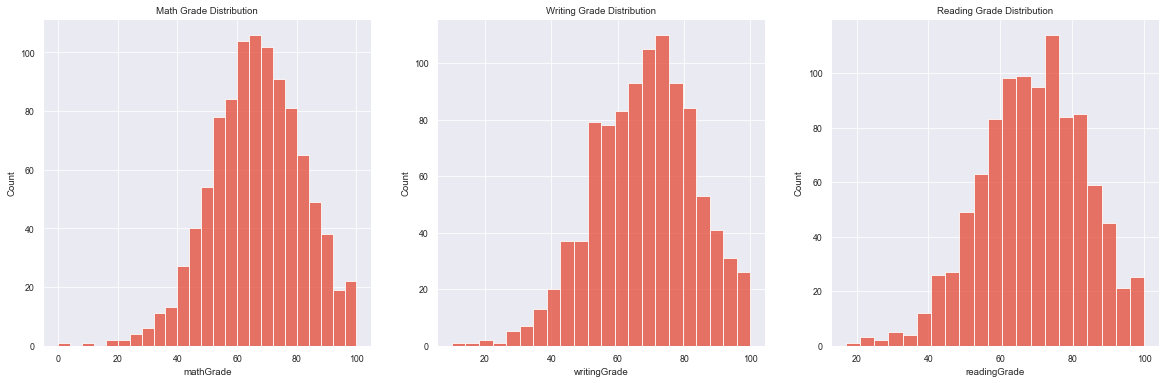

In [297]:
plt.rcParams['figure.figsize'] = [20, 6]
fig,_ = plt.subplots(1,3)

sns.histplot(data=df, x='mathGrade', ax=_[0])
_[0].title.set_text('Math Grade Distribution')

sns.histplot(data=df, x='writingGrade', ax=_[1])
_[1].title.set_text('Writing Grade Distribution')

sns.histplot(data=df, x='readingGrade', ax=_[2])
_[2].title.set_text('Reading Grade Distribution')

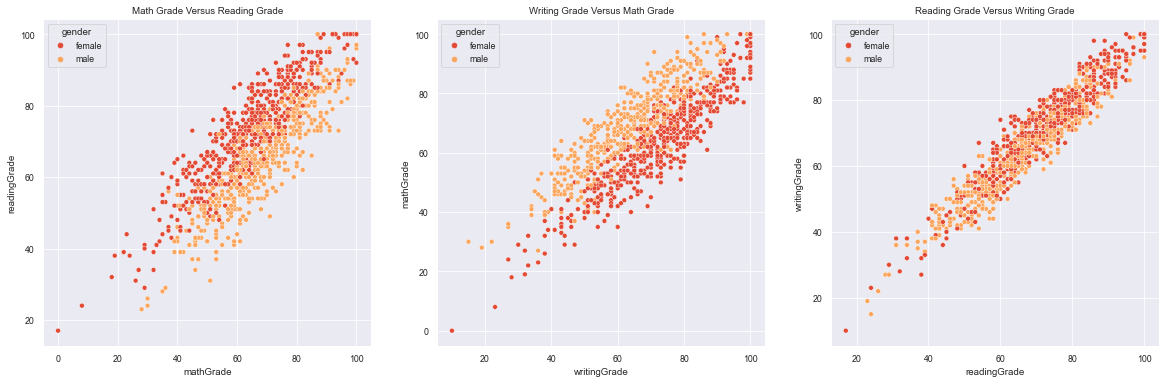

In [296]:
plt.rcParams['figure.figsize'] = [20, 6]
fig,_ = plt.subplots(1,3)

sns.scatterplot(data=df, x='mathGrade', y='readingGrade', hue='gender', ax=_[0])
_[0].title.set_text('Math Grade Versus Reading Grade')

sns.scatterplot(data=df, x='writingGrade', y='mathGrade', hue='gender', ax=_[1])
_[1].title.set_text('Writing Grade Versus Math Grade')

sns.scatterplot(data=df, x='readingGrade', y='writingGrade', hue='gender', ax=_[2])
_[2].title.set_text('Reading Grade Versus Writing Grade')


Clear correlation between the subjects.

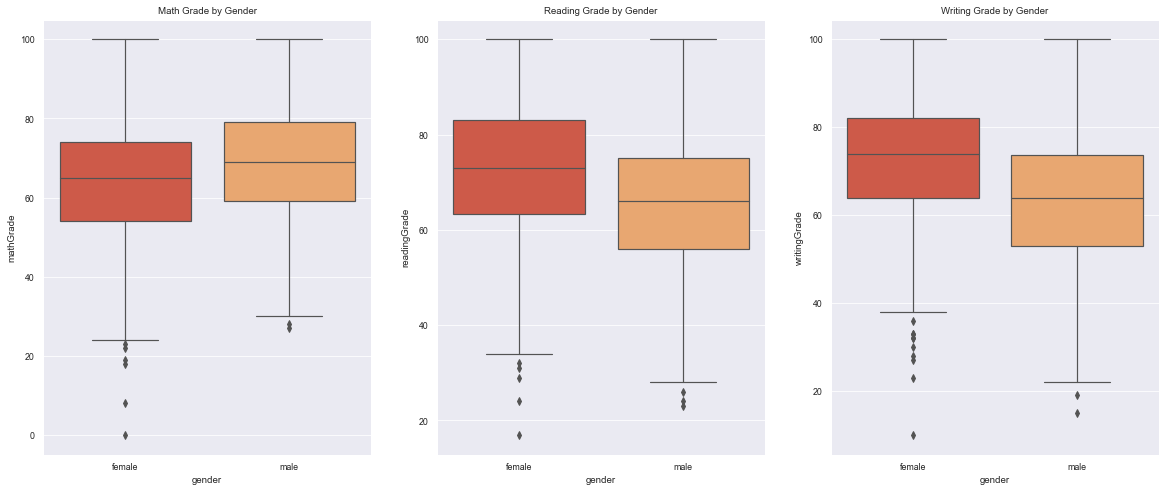

In [295]:
plt.rcParams['figure.figsize'] = [20, 8]
fig,_ = plt.subplots(1,3)

sns.boxplot(data = df, x="gender", y="mathGrade", ax=_[0])
_[0].title.set_text('Math Grade by Gender')

sns.boxplot(data=df, x="gender", y="readingGrade",  ax=_[1])
_[1].title.set_text('Reading Grade by Gender')

sns.boxplot(data=df, x="gender", y="writingGrade", ax=_[2])
_[2].title.set_text('Writing Grade by Gender')

It is clear that females outperform males in reading and writing, but males surpass females in math.

In [217]:
edu_math = df.groupby('parentEducation')['mathGrade'].mean()
edu_reading = df.groupby('parentEducation')['readingGrade'].mean()
edu_writing = df.groupby('parentEducation')['writingGrade'].mean()

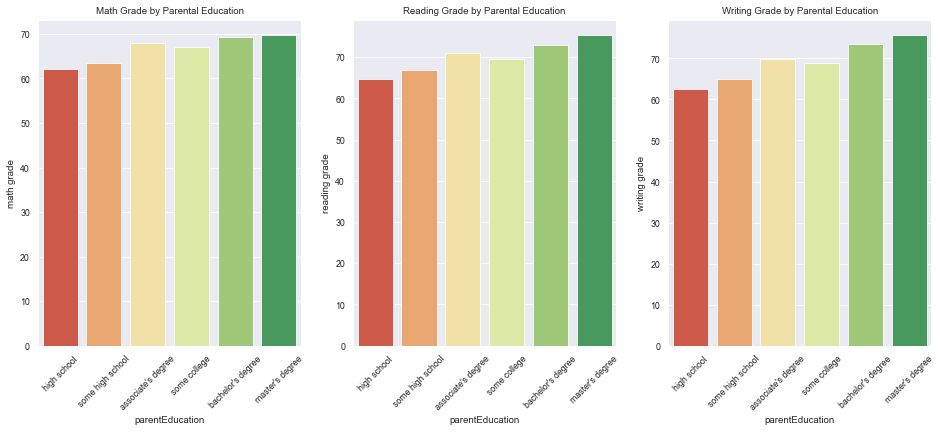

In [292]:
plt.rcParams['figure.figsize'] = [16, 6]
fig,_ = plt.subplots(1,3)

sns.barplot(x=edu_math.index, y=edu_math.values, order=['high school', 'some high school', "associate's degree", 'some college', "bachelor's degree", "master's degree"],  ax=_[0])
_[0].tick_params('x', labelrotation=45)
_[0].set_ylabel('math grade')
_[0].title.set_text('Math Grade by Parental Education')

sns.barplot(x=edu_reading.index, y=edu_reading.values, order=['high school', 'some high school', "associate's degree", 'some college', "bachelor's degree", "master's degree"], ax=_[1])
_[1].tick_params('x', labelrotation=45)
_[1].set_ylabel('reading grade')
_[1].title.set_text('Reading Grade by Parental Education')

sns.barplot(x=edu_writing.index, y=edu_writing.values, order=['high school', 'some high school', "associate's degree", 'some college', "bachelor's degree", "master's degree"], ax=_[2])
_[2].tick_params('x', labelrotation=45)
_[2].set_ylabel('writing grade')
_[2].title.set_text('Writing Grade by Parental Education')

A child's grades typically increase with the parent's education level.

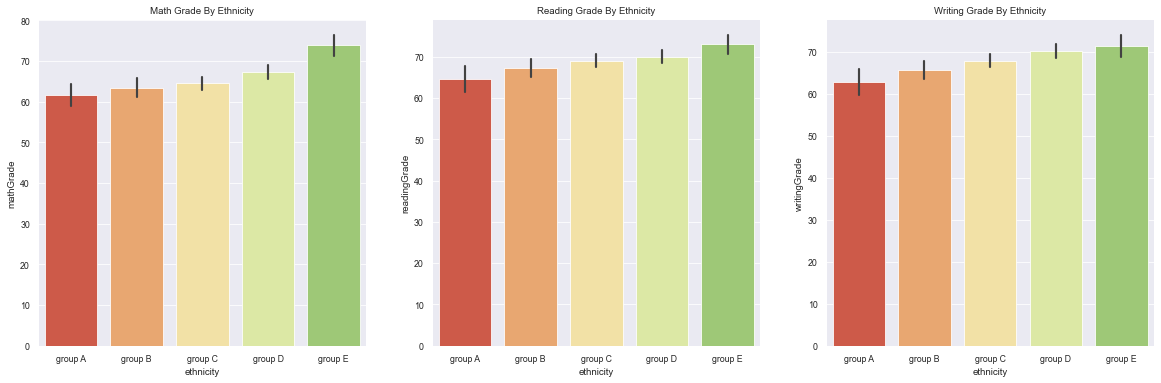

In [301]:
plt.rcParams['figure.figsize'] = [20, 6]
fig,_ = plt.subplots(1,3)

sns.barplot(data=df, x='ethnicity', y="mathGrade", order=['group A', 'group B', 'group C', 'group D', 'group E'], ax=_[0])
_[0].title.set_text('Math Grade By Ethnicity')

sns.barplot(data=df, x='ethnicity', y="readingGrade", order=['group A', 'group B', 'group C', 'group D', 'group E'], ax=_[1])
_[1].title.set_text('Reading Grade By Ethnicity')

sns.barplot(data=df, x='ethnicity', y="writingGrade", order=['group A', 'group B', 'group C', 'group D', 'group E'], ax=_[2])
_[2].title.set_text('Writing Grade By Ethnicity')

Grades increase slightly with each ethnicity.

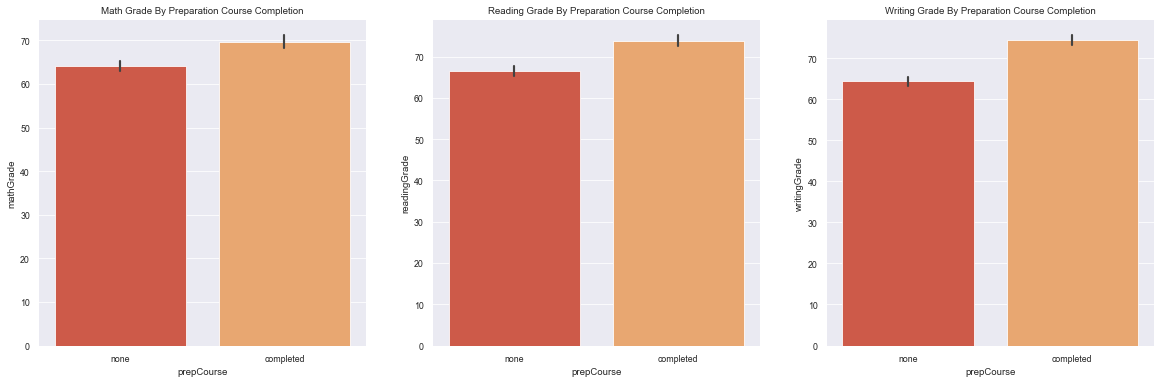

In [303]:
plt.rcParams['figure.figsize'] = [20, 6]
fig,_ = plt.subplots(1,3)

sns.barplot(data=df, x='prepCourse', y="mathGrade", ax=_[0])
_[0].title.set_text('Math Grade By Preparation Course Completion')

sns.barplot(data=df, x='prepCourse', y="readingGrade", ax=_[1])
_[1].title.set_text('Reading Grade By Preparation Course Completion')

sns.barplot(data=df, x='prepCourse', y="writingGrade", ax=_[2])
_[2].title.set_text('Writing Grade By Preparation Course Completion')

Students who completed the preparation course recieved better grades.

# Modelling

In [219]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [238]:
df2 = df.drop(['mathGrade', 'readingGrade', 'writingGrade'], axis=1)

In [239]:
target = df2['averageGrade']
df2 = df2.drop('averageGrade', axis=1)

In [240]:
dummy_cols = df[['gender', 'ethnicity', 'parentEducation', 'lunch',
       'prepCourse']]
dummy_cols = pd.get_dummies(dummy_cols)
dummy_cols.head()

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parentEducation_associate's degree,parentEducation_bachelor's degree,parentEducation_high school,parentEducation_master's degree,parentEducation_some college,parentEducation_some high school,lunch_free/reduced,lunch_standard,prepCourse_completed,prepCourse_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [246]:
## Split data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(dummy_cols, target, test_size=0.3, random_state=10)

In [248]:
## Creating a pipeline to speed up modelling

pipe_LR = Pipeline([("pca1",PCA(n_components=10)),("LR", LinearRegression(normalize=True))])
pipe_G = Pipeline([("pca4",PCA(n_components=10)),("XGB",GradientBoostingRegressor())])
pipe_RF = Pipeline([("pca3",PCA(n_components=10)),("RF",RandomForestRegressor())])
pipe_DT = Pipeline([("pca2",PCA(n_components=10)),("DT",DecisionTreeRegressor())])
pipe_KNN = Pipeline([("pca4",PCA(n_components=10)),("KNN",KNeighborsRegressor())])

In [243]:
pipes = [pipe_LR, pipe_G, pipe_RF, pipe_DT, pipe_KNN]
pipe_dict = {
    0: "LinearRegression",
    1: "GradientBoostingRegressor",
    2: "RandomForestRegressor",
    3: "DecisionTreeRegressor",
    4: "KNeighborsRegressor"
}

In [245]:
## Calculate error for training and testing datasets for all models

for i, model in enumerate(pipes):
    
    y_train_fit = model.fit(X_train, y_train)
    y_train_pred = y_train_fit.predict(X_train)
    y_test_pred = y_train_fit.predict(X_test)
    
    MSE_train = mean_squared_error(y_train, y_train_pred, squared=True)
    MAE_train = mean_absolute_error(y_train, y_train_pred)
    RS_train = r2_score(y_train, y_train_pred)
    
    MSE_test = mean_squared_error(y_test, y_test_pred, squared=True)
    MAE_test = mean_absolute_error(y_test, y_test_pred)
    RS_test = r2_score(y_test, y_test_pred)
    
    print("%s Training Set:\nMSE: %f\nMAE: %f\nR^2: %f" % (pipe_dict[i], MSE_train, MAE_train, RS_train))
    print("%s Testing Set:\nMSE: %f\nMAE: %f\nR^2: %f\n\n" % (pipe_dict[i], MSE_test, MAE_test, RS_test))

LinearRegression Training Set:
MSE: 157.450590
MAE: 10.110900
R^2: 0.244052
LinearRegression Testing Set:
MSE: 158.714140
MAE: 10.258790
R^2: 0.167672


GradientBoostingRegressor Training Set:
MSE: 120.265253
MAE: 8.748027
R^2: 0.422586
GradientBoostingRegressor Testing Set:
MSE: 203.663760
MAE: 11.341011
R^2: -0.068053


RandomForestRegressor Training Set:
MSE: 115.221405
MAE: 8.502098
R^2: 0.446802
RandomForestRegressor Testing Set:
MSE: 207.633140
MAE: 11.460191
R^2: -0.088869


DecisionTreeRegressor Training Set:
MSE: 112.890785
MAE: 8.238971
R^2: 0.457992
DecisionTreeRegressor Testing Set:
MSE: 249.676070
MAE: 12.294764
R^2: -0.309350


KNeighborsRegressor Training Set:
MSE: 133.414804
MAE: 9.239163
R^2: 0.359452
KNeighborsRegressor Testing Set:
MSE: 210.463563
MAE: 11.497887
R^2: -0.103712




# Conclusion
- Linear regression was the only model with a positive R-Squared value for the testing set.
- This means the other models were a poor fit for the data
- Even though R^2 was positive for Linear Regression, it is still a very low value (0.24) and isn't correct most of the time

**Results:**  
*LinearRegression Training Set:*  
        MSE: 157.450590  
        MAE: 10.110900  
        R^2: 0.244052  
        
*LinearRegression Testing Set:*  
        MSE: 158.714140  
        MAE: 10.258790  
        R^2: 0.167672  